# üì∞ Ïñ¥Î¶∞Ïù¥ Îâ¥Ïä§ EDA

## 1. import

In [1]:
import os
import numpy as np
import pandas as pd
#import spacy # ÌïúÍµ≠Ïñ¥ ÏßÄÏõê ÏïàÌï®
import re
import string
import math
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


sns.set(font="AppleGothic",
        rc={"axes.unicode_minus":False},
        style='whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 2. Load the dataset

In [2]:
df = pd.read_csv('./kid_news_20220411.csv',sep='\t', header=0)

## 3. Look at the dataset

In [3]:
df.head()

news_url  \
0  http://kid.chosun.com/site/data/html_dir/2022/...   
1  http://kid.chosun.com/site/data/html_dir/2022/...   
2  http://kid.chosun.com/site/data/html_dir/2022/...   
3  http://kid.chosun.com/site/data/html_dir/2022/...   
4  http://kid.chosun.com/site/data/html_dir/2022/...   

                                          news_title  \
0                  Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©   
1                  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] MSÍ∞Ä ÎΩëÏùÄ ‚ÄòÏò¨Ìï¥Ïùò ‰∫û Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìú‚ÄôÎäî?   
2              [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ‚ÄúÍ±∞ÎåÄ ‚ÄòÎ≤®Î¶¨Í≥∞‚Äô Î≥¥Îü¨ Í∞ÄÏûê‚Äù Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏   
3  [ÎèÖÏûê¬∑Î™ÖÏòàÍ∏∞Ïûê ÌïôÎ∂ÄÎ™®ÏóêÍ≤å Î¨ºÏóàÎã§] ‚ÄúÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà¬∑ÌôòÎ∂à Ïïà Îêò...   
4                  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ‚ÄúÍ∏àÏúµ, Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä‚Äù Ï§ëÏöîÏÑ± Í∞ïÏ°∞   

                           news_date  \
0  {'$date': '2022-04-07T00:01:00Z'}   
1  {'$date': '2022-04-11T00:01:00Z'}   
2  {'$date': '2022-04-07T00:01:00Z'}   
3  {'$date': '2022-04-11T00:01:00Z'}   
4  {'$date': '2022-04-11T00:01:00Z'}   

                                        news_article  
0  Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µ(‰æµÊîª)Ïóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄ...  
1  ‚ñ≤ /ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏(MS)Í∞Ä ÎΩëÏùÄ 'Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ(Startu...  
2  ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏(ÈáéÂ§ñ) ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ  ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞...  
3  "Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî." "ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥º...  
4  ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ CNBCÎäî ÏßÄÎÇú 6Ïùº(ÌòÑÏßÄ ÏãúÍ∞Å) Í∞úÏµúÎêú 'Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùò'Ïóê...

In [4]:
print(list(df.columns))
print(df.shape)

['news_url', 'news_title', 'news_date', 'news_article']
(1760, 4)


In [5]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥Î•º ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_url      1760 non-null   object
 1   news_title    1760 non-null   object
 2   news_date     1760 non-null   object
 3   news_article  1760 non-null   object
dtypes: object(4)
memory usage: 55.1+ KB


---

## 4. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨(Data Preprocessing)

### Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [6]:
# Í≤∞Ï∏°Í∞í ÌôïÏù∏
df.isnull().sum()

news_url        0
news_title      0
news_date       0
news_article    0
dtype: int64

In [7]:
df = df.fillna("")

In [8]:
# Í≤∞Ï∏°Í∞í ÌôïÏù∏
df.isna().sum()

news_url        0
news_title      0
news_date       0
news_article    0
dtype: int64

---

### Î¨∏ÏûêÏó¥ Í∏∏Ïù¥ ÌôïÏù∏ Î∞è Ï∂îÍ∞Ä

In [9]:
df['news_len'] = df['news_article'].apply(lambda x: len(x))

In [10]:
df.head()

news_url  \
0  http://kid.chosun.com/site/data/html_dir/2022/...   
1  http://kid.chosun.com/site/data/html_dir/2022/...   
2  http://kid.chosun.com/site/data/html_dir/2022/...   
3  http://kid.chosun.com/site/data/html_dir/2022/...   
4  http://kid.chosun.com/site/data/html_dir/2022/...   

                                          news_title  \
0                  Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©   
1                  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] MSÍ∞Ä ÎΩëÏùÄ ‚ÄòÏò¨Ìï¥Ïùò ‰∫û Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìú‚ÄôÎäî?   
2              [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ‚ÄúÍ±∞ÎåÄ ‚ÄòÎ≤®Î¶¨Í≥∞‚Äô Î≥¥Îü¨ Í∞ÄÏûê‚Äù Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏   
3  [ÎèÖÏûê¬∑Î™ÖÏòàÍ∏∞Ïûê ÌïôÎ∂ÄÎ™®ÏóêÍ≤å Î¨ºÏóàÎã§] ‚ÄúÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà¬∑ÌôòÎ∂à Ïïà Îêò...   
4                  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ‚ÄúÍ∏àÏúµ, Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä‚Äù Ï§ëÏöîÏÑ± Í∞ïÏ°∞   

                           news_date  \
0  {'$date': '2022-04-07T00:01:00Z'}   
1  {'$date': '2022-04-11T00:01:00Z'}   
2  {'$date': '2022-04-07T00:01:00Z'}   
3  {'$date': '2022-04-11T00:01:00Z'}   
4  {'$date': '2022-04-11T00:01:00Z'}   

                                        news_article  news_len  
0  Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µ(‰æµÊîª)Ïóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄ...       809  
1  ‚ñ≤ /ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏(MS)Í∞Ä ÎΩëÏùÄ 'Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ(Startu...       504  
2  ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏(ÈáéÂ§ñ) ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ  ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞...       373  
3  "Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî." "ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥º...       958  
4  ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ CNBCÎäî ÏßÄÎÇú 6Ïùº(ÌòÑÏßÄ ÏãúÍ∞Å) Í∞úÏµúÎêú 'Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùò'Ïóê...       471

In [11]:
# min Í∞íÏùÑ Î¥§ÏùÑ Îïå Í∏∞ÏÇ¨Í∞Ä ÏßßÏùÄ Í≤ΩÏö∞ Ï°¥Ïû¨
df.describe().T

count        mean         std   min    25%    50%     75%     max
news_len  1760.0  997.163068  713.582501  16.0  487.0  775.5  1228.0  9741.0

---

### Ïù¥ÏÉÅÏπò ÌôïÏù∏
- Ïù¥ÏÉÅÌïú Îâ¥Ïä§ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [12]:
# Í∏∞ÏÇ¨ Í∏∏Ïù¥ 200 Ïù¥Ìïò ÌôïÏù∏
condition = (df.news_len <= 200)

shorts_df = df[condition][['news_title','news_url','news_len']].sort_values(by='news_len' ,ascending=True)
shorts_df

news_title  \
798                         [ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§] Î®∏Î¶¨Ïóê Î∞•ÏÜ• Îã¨Î¶∞ Î°úÎ¥á Ïù¥ÏïºÍ∏∞   
457               [ÏÉùÏÉù Ïù∏ÌÑ∞Î∑∞ ÌòÑÏû•!] Ï£ºÌïú ÌîÑÎûëÏä§ ÎåÄÏÇ¨ 'ÌïÑÎ¶Ω Î•¥Ìè¨Î•¥'Î•º ÎßåÎÇòÎã§!   
789                            [ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§] ÌôòÍ≤ΩÌååÍ¥¥Ïùò Ï£ºÎ≤î ÎàÑÌÖîÎùº?   
793                        Ïû†ÏûêÎ¶¨ ÎìúÎ°†Í≥º ÌíçÏÑ† ÎßùÏõêÍ≤Ω? Í≥ºÍ∞êÌïú Î∞ïÏÉàÏùò ÏÇ¨Ïó∞ÏùÄ?   
918   [ÎèôÏòÅÏÉÅ]"ÎãàÎÑ§ ÏßëÏóê ÏöîÎ¶¨Î°úÎ¥á ÏûàÏñ¥? ÎπÑÏÑúÎ°úÎ¥áÏùÄ?"..."Î°úÎ¥á Î™á ÎåÄ ÏûàÎãà?" Î¨ªÎäî...   
391                            [Ï†ïÎãµ Í≥µÍ∞ú] ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÌçºÏ¶ê, Ïà®ÏùÄÍ∑∏Î¶ºÏ∞æÍ∏∞   
201                     [ÍøÄBeeTV] Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê Ï∂©Ï£º Í∏∞ÏÉÅÍ≥ºÌïôÍ¥ÄÏóê Í∞ÄÎã§!   
256                                         Ïã†ÏûêÏòÅÏùò 5Î∂Ñ ÏòÅÏñ¥!   
687                       [POPCORN NEWS] Íµ≠Íµ∞Ïùò ÎÇ† ÌäπÏßë! ÏòÅÏÉÅÎâ¥Ïä§   
124                               [ÍøÄBeeTV] ÎåÄÌÜµÎ†π Í∏∞Î°ùÍ¥ÄÏóê Í∞ÄÎã§!   
1594                          Í∞ÑÌé∏ÌïòÍ≤å Ìïú ÎÅº Ï±ôÍ∏∏ Îïê Ï´ÄÎìùÏ´ÄÎìù Í∑∏ÎûòÎÜÄÎùº Î∞î   
1569                              Ìé∏ÌïòÍ≤å Îì§Í≥† 'ÏèôÏèô' ÌïúÏûÖ ÌÜ†Ïä§Ìä∏ Íº¨Ïπò   
1614                               ÎÖ∏Î¶áÌïòÍ≤å Íµ¨ÏõåÎ≥ºÍπå? Ìè≠Ïã†Ìè≠Ïã† Ìå¨ÏºÄÏù¥ÌÅ¨   
464                               [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ∏ÏÉÅ Í∞ÄÏû• ÏûëÏùÄ ÎÇòÎùºÎì§   
1642                    [Ïπ¥ÎìúÎâ¥Ïä§] "Ï∑®ÎØ∏ÌôúÎèô ÎäòÏóàÏßÄÎßå, ÏπúÍµ¨ Î™ªÎßåÎÇò ÏÜçÏÉÅÌï¥Ïöî"   
1532                                  ÎèåÎèå ÎßêÎ†∏ÎÑ§! ÎßõÏûàÎäî ÏãúÍ∏àÏπò Î°§   
202                          [ÍøÄBeeTV] 'ÏïåÎ¶¨ÏôÄ ÏïÑÎ∏åÎùºÌï®' ÌòïÏ†ú Ïù¥ÏïºÍ∏∞   
94                      [#ÍøÄBeeTV_Ïã†ÏûêÏòÅÏùò5Î∂ÑÏòÅÏñ¥] Ìá¥ÏÇ¨Ìï† ÎªîÌïú Ïù¥ÏïºÍ∏∞..   
125                  [#ÍøÄBeeTV_Ïã†ÏûêÏòÅÏùò5Î∂ÑÏòÅÏñ¥] ÏÇ¨ÎûëÌñàÎçò ÏïÑÎÇ¥ÏôÄ ÏÇ¨Î≥ÑÌïú ÎÇ®Ïûê   
65                  [#ÍøÄBeeTV_Ïã†ÏûêÏòÅÏùò5Î∂ÑÏòÅÏñ¥] Ìï†Î®∏ÎãàÍ∞Ä Ï†ÑÌï¥Ï§Ä ÏÇ∂Ïùò ÏùòÎØ∏!    
139                     [ÍøÄBeeTV] Î¨¥Ïù∏ÎèÑÏóêÏÑú Í∑πÏ†ÅÏúºÎ°ú ÌÉàÏ∂úÌïú ÏÉùÏ°¥Ïûê Ïù¥ÏïºÍ∏∞   
217                     [ÍøÄbeetv] ÎåÄÎÇòÎ¨¥ÏôÄ Í≥†ÏÇ¨Î¶¨ Í∑∏Î¶¨Í≥† Ìïú ÎÇ®ÏûêÏùò Ïù¥ÏïºÍ∏∞   
1550                                  Ï¥àÏΩúÎ¶ø Ïûº ÌíàÏùÄ Î∞îÎÇòÎÇò ÌÅ¨Î†àÏù¥ÌîÑ   
171                     [ÍøÄBeeTV] ÏïÑÎ¨¥Î¶¨ ÎèàÏù¥ ÎßéÏïÑÎèÑ ÏÇ¥ Ïàò ÏóÜÎäî Í≤ÉÏùÄ?    
1665                              Í∏∞Î°ù, Îòê Í∏∞Î°ù‚Ä¶ ÏºÄÏù¥ÌåùÏóê ÌïúÍ≥ÑÎûÄ ÏóÜÎã§   

                                               news_url  news_len  
798   http://kid.chosun.com/site/data/html_dir/2021/...        16  
457   http://kid.chosun.com/site/data/html_dir/2021/...        22  
789   http://kid.chosun.com/site/data/html_dir/2021/...        27  
793   http://kid.chosun.com/site/data/html_dir/2021/...        28  
918   http://kid.chosun.com/site/data/html_dir/2021/...        49  
391   http://kid.chosun.com/site/data/html_dir/2021/...        49  
201   http://kid.chosun.com/site/data/html_dir/2022/...        55  
256   http://kid.chosun.com/site/data/html_dir/2022/...        59  
687   http://kid.chosun.com/site/data/html_dir/2021/...        64  
124   http://kid.chosun.com/site/data/html_dir/2022/...        66  
1594  http://kid.chosun.com/site/data/html_dir/2020/...        72  
1569  http://kid.chosun.com/site/data/html_dir/2020/...        72  
1614  http://kid.chosun.com/site/data/html_dir/2020/...        75  
464   http://kid.chosun.com/site/data/html_dir/2021/...        91  
1642  http://kid.chosun.com/site/data/html_dir/2020/...        95  
1532  http://kid.chosun.com/site/data/html_dir/2020/...       104  
202   http://kid.chosun.com/site/data/html_dir/2022/...       111  
94    http://kid.chosun.com/site/data/html_dir/2022/...       111  
125   http://kid.chosun.com/site/data/html_dir/2022/...       113  
65    http://kid.chosun.com/site/data/html_dir/2022/...       116  
139   http://kid.chosun.com/site/data/html_dir/2022/...       116  
217   http://kid.chosun.com/site/data/html_dir/2022/...       133  
1550  http://kid.chosun.com/site/data/html_dir/2020/...       152  
171   http://kid.chosun.com/site/data/html_dir/2022/...       16

In [13]:
shorts_df.shape

(25, 3)

In [14]:
short_title = shorts_df.news_title
list(short_title)

['[ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§] Î®∏Î¶¨Ïóê Î∞•ÏÜ• Îã¨Î¶∞ Î°úÎ¥á Ïù¥ÏïºÍ∏∞',
 "[ÏÉùÏÉù Ïù∏ÌÑ∞Î∑∞ ÌòÑÏû•!] Ï£ºÌïú ÌîÑÎûëÏä§ ÎåÄÏÇ¨ 'ÌïÑÎ¶Ω Î•¥Ìè¨Î•¥'Î•º ÎßåÎÇòÎã§!",
 '[ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§] ÌôòÍ≤ΩÌååÍ¥¥Ïùò Ï£ºÎ≤î ÎàÑÌÖîÎùº?',
 'Ïû†ÏûêÎ¶¨ ÎìúÎ°†Í≥º ÌíçÏÑ† ÎßùÏõêÍ≤Ω? Í≥ºÍ∞êÌïú Î∞ïÏÉàÏùò ÏÇ¨Ïó∞ÏùÄ?',
 '[ÎèôÏòÅÏÉÅ]"ÎãàÎÑ§ ÏßëÏóê ÏöîÎ¶¨Î°úÎ¥á ÏûàÏñ¥? ÎπÑÏÑúÎ°úÎ¥áÏùÄ?"..."Î°úÎ¥á Î™á ÎåÄ ÏûàÎãà?" Î¨ªÎäî ÏÑ∏ÏÉÅ Ïò®Îã§!',
 '[Ï†ïÎãµ Í≥µÍ∞ú] ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÌçºÏ¶ê, Ïà®ÏùÄÍ∑∏Î¶ºÏ∞æÍ∏∞',
 '[ÍøÄBeeTV] Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê Ï∂©Ï£º Í∏∞ÏÉÅÍ≥ºÌïôÍ¥ÄÏóê Í∞ÄÎã§!',
 'Ïã†ÏûêÏòÅÏùò 5Î∂Ñ ÏòÅÏñ¥!',
 '[POPCORN NEWS] Íµ≠Íµ∞Ïùò ÎÇ† ÌäπÏßë! ÏòÅÏÉÅÎâ¥Ïä§',
 '[ÍøÄBeeTV] ÎåÄÌÜµÎ†π Í∏∞Î°ùÍ¥ÄÏóê Í∞ÄÎã§!',
 'Í∞ÑÌé∏ÌïòÍ≤å Ìïú ÎÅº Ï±ôÍ∏∏ Îïê Ï´ÄÎìùÏ´ÄÎìù Í∑∏ÎûòÎÜÄÎùº Î∞î',
 "Ìé∏ÌïòÍ≤å Îì§Í≥† 'ÏèôÏèô' ÌïúÏûÖ ÌÜ†Ïä§Ìä∏ Íº¨Ïπò",
 'ÎÖ∏Î¶áÌïòÍ≤å Íµ¨ÏõåÎ≥ºÍπå? Ìè≠Ïã†Ìè≠Ïã† Ìå¨ÏºÄÏù¥ÌÅ¨',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ∏ÏÉÅ Í∞ÄÏû• ÏûëÏùÄ ÎÇòÎùºÎì§',
 '[Ïπ¥ÎìúÎâ¥Ïä§] "Ï∑®ÎØ∏ÌôúÎèô ÎäòÏóàÏßÄÎßå, ÏπúÍµ¨ Î™ªÎßåÎÇò ÏÜçÏÉÅÌï¥Ïöî"',
 'ÎèåÎèå ÎßêÎ†∏ÎÑ§! 

---

### Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
- ÏãúÎ¶¨Ï¶à Í∏∞ÏÇ¨ titleÍ≥º Í∑∏ Ïô∏ text title ÌôïÏù∏

In [15]:
# Ï†ÑÏ≤¥ Í∏∞ÏÇ¨ ÎåÄÏÉÅ ÏßÑÌñâ
split_title = []

for title in df.news_title:
    # m = re.search(r'(?<=\[).*(?=\])', title)
    m = re.search(r'\[(.*?)\]', title)
    if m :
        split_title.append(m.group())
    else:
        # sub_text = re.sub(r'[?]',"\?",title)
        split_title.append(title)

In [16]:
df['split_title'] = split_title

In [17]:
df[['split_title']][:10]

split_title
0  Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©
1                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
2                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
3                [ÎèÖÏûê¬∑Î™ÖÏòàÍ∏∞Ïûê ÌïôÎ∂ÄÎ™®ÏóêÍ≤å Î¨ºÏóàÎã§]
4                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
5                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
6                            Í∏∞ÏûêÎì§Ïùò ÏàòÎã§
7                          [ÏïÑÏã∏~ Ïù¥Îìù!]
8                      [Î∞òÎ†§ÎèôÎ¨º ÏõÉÍ∏¥ ÏÇ¨ÏßÑÏ†Ñ]
9                            [Í∏∞Ïûê ÏàòÏ≤©]

In [18]:
# ÏãúÎ¶¨Ï¶à Í∏∞ÏÇ¨ Ïú†ÎãàÌÅ¨ Í∞í Ï≤¥ÌÅ¨
count_unique_title = df.split_title.value_counts()
count_unique_title[count_unique_title >= 2]

[Îâ¥Ïä§ÌÉêÌóòÎåÄ]                  584
[Ïò§ÎäòÏùò ÌÇ§ÏõåÎìú]                 95
Í∏∞ÏûêÎì§Ïùò ÏàòÎã§                   81
[ÌåùÏΩòÎâ¥Ïä§]                    28
[Ï£ºÎ™©! Ï†ïÎ≥¥ Î†àÌÑ∞]               23
[Ìë∏Î•∏ Î≥Ñ, ÏßÄÍµ¨Î•º ÏßÄÏºúÎùº]           15
[ESG Í∏∞ÏóÖ ÌÉêÎ∞©]               14
[ÏùòÌïô Ï†ïÎ≥¥ ÏèôÏèô, Ïö∞Î¶¨ ÏïÑÏù¥ Ïë•Ïë•]      12
[Í∏∞Ïûê ÏàòÏ≤©]                   12
[Ïù¥Ïä¨Í∏∞Ïùò Ïä¨Í∏∞Î°úÏö¥ Ïä§ÌÜ†Î¶¨ Ïû°Ïä§]        10
[Ïó¨Îü¨Î∂ÑÏùò ÏÉùÍ∞ÅÏùÄ?]                8
[Í∏∞Ìöç]                       8
[Ïö∞Î¶¨Ïùò Î≥¥Í∏àÏûêÎ¶¨, ÎÜÄÎùºÏö¥ ‰ΩèÂ±Ö ÏÉÅÏãù]      7
[ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú]                   7
[ÏÇ¨ÏßÑÏúºÎ°ú Î≥¥Îäî ÏÑ∏ÏÉÅ]               7
[ÏïåÏ∞®Í≥† ÌÜµÌÜµÌäÄÎäî Ïù∏ÌÑ∞Î∑∞]             7
[ÍøÄBeeTV]                   5
[Ìò∏Íµ≠ Î≥¥ÌõàÏùò Îã¨ ÌäπÏßë]              5
[ÌòÑÏû•]                       5
[ÌÉÑÏÜå Ï§ëÎ¶Ω Í∏∞Ìöç]                 4
[Ï¥àÎì± Ìä∏Î†åÎìú]                   4
[Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê]                 4
[ÏïåÎ¶ΩÎãàÎã§]                     3
[#ÍøÄBeeTV_Ïã†ÏûêÏòÅÏùò5Î∂ÑÏòÅÏñ¥]     

In [19]:
# 200Ï§Ñ Ïù¥Ìïò Í∏∞ÏÇ¨ ÎåÄÏÉÅ ÏßÑÌñâ
import re

split_title = []

for title in short_title:
    m = re.search(r'\[(.*?)\]', title)
    if m :
        split_title.append(m.group())
    else:
        split_title.append(title)

In [20]:
list(set(split_title))

['[ÏÉùÏÉù Ïù∏ÌÑ∞Î∑∞ ÌòÑÏû•!]',
 'ÎÖ∏Î¶áÌïòÍ≤å Íµ¨ÏõåÎ≥ºÍπå? Ìè≠Ïã†Ìè≠Ïã† Ìå¨ÏºÄÏù¥ÌÅ¨',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§]',
 'Ï¥àÏΩúÎ¶ø Ïûº ÌíàÏùÄ Î∞îÎÇòÎÇò ÌÅ¨Î†àÏù¥ÌîÑ',
 '[Ï†ïÎãµ Í≥µÍ∞ú]',
 '[Ïπ¥ÎìúÎâ¥Ïä§]',
 'Ïã†ÏûêÏòÅÏùò 5Î∂Ñ ÏòÅÏñ¥!',
 'Ïû†ÏûêÎ¶¨ ÎìúÎ°†Í≥º ÌíçÏÑ† ÎßùÏõêÍ≤Ω? Í≥ºÍ∞êÌïú Î∞ïÏÉàÏùò ÏÇ¨Ïó∞ÏùÄ?',
 '[#ÍøÄBeeTV_Ïã†ÏûêÏòÅÏùò5Î∂ÑÏòÅÏñ¥]',
 '[ÍøÄBeeTV]',
 'Í∞ÑÌé∏ÌïòÍ≤å Ìïú ÎÅº Ï±ôÍ∏∏ Îïê Ï´ÄÎìùÏ´ÄÎìù Í∑∏ÎûòÎÜÄÎùº Î∞î',
 '[ÍøÄbeetv]',
 'Í∏∞Î°ù, Îòê Í∏∞Î°ù‚Ä¶ ÏºÄÏù¥ÌåùÏóê ÌïúÍ≥ÑÎûÄ ÏóÜÎã§',
 '[ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§]',
 'ÎèåÎèå ÎßêÎ†∏ÎÑ§! ÎßõÏûàÎäî ÏãúÍ∏àÏπò Î°§',
 "Ìé∏ÌïòÍ≤å Îì§Í≥† 'ÏèôÏèô' ÌïúÏûÖ ÌÜ†Ïä§Ìä∏ Íº¨Ïπò",
 '[POPCORN NEWS]',
 '[ÎèôÏòÅÏÉÅ]']

In [21]:
# Ï†ÑÏ≤¥ Í∏∞ÏÇ¨Ïóê ÎåÄÌïú Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨Î•º ÏßÑÌñâÌï©ÎãàÎã§
print('Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ï†Ñ df ÌÅ¨Í∏∞:',len(df))

Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ï†Ñ df ÌÅ¨Í∏∞: 1760


In [22]:
for title in split_title:
    # Î∂àÏö©Ïñ¥ Îã®Ïñ¥Í∞Ä news_titleÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í±∏Îü¨ÎÉÖÎãàÎã§
    df = df[df['news_title'].apply(lambda x: title not in x)]
    # Í∞ÑÌòπ ÏãúÎ¶¨Ï¶à ÌÉÄÏù¥ÌãÄÏù¥ Í∏∞ÏÇ¨ Î≥∏Î¨∏ ÏïàÏóêÏÑú ÏãúÏûëÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§
    df = df[df['news_article'].apply(lambda x: title not in x)]

In [23]:
print('Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞:',len(df))

Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞: 1735


In [24]:
# Í∏∞ÏÇ¨Ïùò Í∏∏Ïù¥Í∞Ä 300Í∞ú ÏïÑÎûòÏù∏ Í≤ΩÏö∞ Î≤ÑÎ¶º
# Î¨∏Ïû• ÏöîÏïΩÏùÑ ÏúÑÌï¥ ÏÑ∏ Î¨∏Ïû•Î≥¥Îã§ ÎßéÏùÄ Í∏∞ÏÇ¨Î•º ÌôïÎ≥¥ÌïòÍ∏∞ ÏúÑÌï®
df = df[df['news_len'] > 300].reset_index(drop=True)
df.head(2)

news_url  \
0  http://kid.chosun.com/site/data/html_dir/2022/...   
1  http://kid.chosun.com/site/data/html_dir/2022/...   

                          news_title                          news_date  \
0  Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©  {'$date': '2022-04-07T00:01:00Z'}   
1  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] MSÍ∞Ä ÎΩëÏùÄ ‚ÄòÏò¨Ìï¥Ïùò ‰∫û Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìú‚ÄôÎäî?  {'$date': '2022-04-11T00:01:00Z'}   

                                        news_article  news_len  \
0  Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µ(‰æµÊîª)Ïóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄ...       809   
1  ‚ñ≤ /ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏(MS)Í∞Ä ÎΩëÏùÄ 'Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ(Startu...       504   

                         split_title  
0  Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©  
1                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]

In [25]:
# Ï¥àÍ∏∞ Îç∞Ïù¥ÌÑ∞ : 1675
print('ÏßßÏùÄ Í∏∞ÏÇ¨ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞:',len(df))

ÏßßÏùÄ Í∏∞ÏÇ¨ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞: 1724


---

### ÌäπÏàòÎ¨∏Ïûê Î∞è Í≥µÎ∞± Ï†úÍ±∞

In [26]:
import re 
def clean_text(text): 
    text = re.sub(r'(\[)(.*?)(\])','',str(text)) # remove [title]
    text = re.sub(r'(\()(.*?)(\))', '', text)  # ÏÜåÍ¥ÑÌò∏ (ÏÑ∏Î∂Ä ÏÑ§Î™Ö
    text = re.sub(r'[?!]', '.', text)          # ?! => ÎßàÏπ®Ìëú Ï≤òÎ¶¨
    text = re.sub(r'[\,\¬∑\:\-\_]', ' ', text)  # Î¨∏Ïû•Î∂ÄÌò∏ Íµ¨Î∂ÑÏûê => Í≥µÎ∞± Ï≤òÎ¶¨
    text = text.lower() #lower case 
    text = re.sub(r'\s+', ' ', text) #remove extra space
    # text = re.sub(r'<[^>]+>','',text) #remove Html tags 
    text = re.sub(r'<[^Í∞Ä-Ìû£]+>','',text)# ÌôëÌôîÏÇ¥Í¥ÑÌò∏ => ÌïúÍ∏ÄÎßå ÎπºÍ≥† Ï†úÍ±∞
    text = re.sub(r'^\s+', '', text) #remove space from start
    text = re.sub(r'\s+$', '', text) #remove space from the end
    text = re.sub('[^Í∞Ä-Ìû£\w. ]', '', text)    # ÌïúÍ∏Ä, Î¨∏Ïûê, Ïà´Ïûê, ÎßàÏπ®Ìëú, Í≥µÎ∞± Ï†úÏô∏ Ï†úÍ±∞
    text = re.sub(r'[‰∏Ä-Èæ•]', '', text) #remove Chinese character
    text = re.sub('\s{2,}', ' ', text)        # 2Î≤à Ïù¥ÏÉÅÏùò space Ï†úÍ±∞
    text = text.strip()
    return text

In [27]:
text = ' <p>[ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú] <ÌôîÎßà> "Í≥†ÏñëÏù¥? ssP Îü¨ÏãúÏïÑ¬∑Í≥†ÏñëÏù¥(ÏÜåÎßêÎ¶¨¬∑Ïä§ÌïëÌÅ¨Ïä§¬∑Ïò§Î¶¨ÏóîÌÉà Îì±...)Îäî Ïïà  Îê©ÎãàÎã§.ÁÑ° 1m Ïù¥ÏÉÅ Ïú†ÏßÄÌïòÎäî ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞Î•º ÏãúÌñâ</p>" '
clean_text(text)

'ÌôîÎßà Í≥†ÏñëÏù¥. ssp Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§. 1m Ïù¥ÏÉÅ Ïú†ÏßÄÌïòÎäî ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞Î•º ÏãúÌñâ'

In [28]:
df["news_title"] = df["news_title"].apply(clean_text)
df["news_article"] = df["news_article"].apply(clean_text)

In [29]:
df.head()
# df.iloc[:, ]

news_url  \
0  http://kid.chosun.com/site/data/html_dir/2022/...   
1  http://kid.chosun.com/site/data/html_dir/2022/...   
2  http://kid.chosun.com/site/data/html_dir/2022/...   
3  http://kid.chosun.com/site/data/html_dir/2022/...   
4  http://kid.chosun.com/site/data/html_dir/2022/...   

                       news_title                          news_date  \
0  Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©  {'$date': '2022-04-07T00:01:00Z'}   
1           msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.  {'$date': '2022-04-11T00:01:00Z'}   
2       Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏  {'$date': '2022-04-07T00:01:00Z'}   
3    ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.  {'$date': '2022-04-11T00:01:00Z'}   
4          Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞  {'$date': '2022-04-11T00:01:00Z'}   

                                        news_article  news_len  \
0  Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú...       809   
1  ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µÍ∞ú...       504   
2  ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄÎÇ¨...       373   
3  Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî. ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ÎÇò...       958   
4  ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏ÏãúÏãú...       471   

                         split_title  
0  Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©  
1                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]  
2                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]  
3                [ÎèÖÏûê¬∑Î™ÖÏòàÍ∏∞Ïûê ÌïôÎ∂ÄÎ™®ÏóêÍ≤å Î¨ºÏóàÎã§]  
4                            [Îâ¥Ïä§ÌÉêÌóòÎåÄ]

---

## 5. news_article Î¨∏Ïû• Î∂ÑÎ¶¨

### split() ÏÇ¨Ïö©

In [30]:
# (\. ) Ïò®Ï†êÏúºÎ°ú Î∂ÑÎ¶¨
df["split_article"] = df.news_article.str.split('\. ')

In [31]:
df["split_article"]

0       [Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑ...
1       [ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µ...
2       [ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄ...
3       [Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî, ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ...
4       [ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏Ïãú...
                              ...                        
1719    [ÏßÄÍ∏ãÏßÄÍ∏ãÌïú Î∞îÌÄ¥Î≤åÎ†à ÎÑå ÎàÑÍµ¨ÎÉê, Í∏¥ Ïû•ÎßàÍ∞Ä ÎÅùÎÇòÍ≥†ÎèÑ ÎπÑÍ∞Ä Ïò§ÎùΩÍ∞ÄÎùΩÌïòÎ©¥ÏÑú Î∞îÌÄ¥Î≤åÎ†àÏôÄ...
1720    [Ïä§ÌéòÏù∏ Ïó∞Íµ¨ÌåÄ ÏßÄÎ∞© Îãπ ÎßéÏùÄ Í∞ÄÍ≥µÏãùÌíà ÏãùÏäµÍ¥Ä Î∂ÑÏÑù ÎßéÏù¥ Î®πÎäî Í∑∏Î£π ÎÖ∏ÌôîÏôÄ Í¥ÄÎ†®Îêú ...
1721    [ÎùµÎò•, ÏÑ†Î¨ºÏù¥ ÎèÑÏ∞©ÌñàÏäµÎãàÎã§, ÌåêÌÉÄÏßÄ ÏÜåÏÑ§ Ìï¥Î¶¨Ìè¨ÌÑ∞

In [32]:
df.news_article[0]

'Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú ÍµêÏú°ÏùÑ Î©àÏ∂îÏßÄ ÏïäÍ≥† ÏûàÎã§. Íµ≠Ï†úÍ∏∞Íµ¨ÎèÑ Ï†ÅÍ∑π ÏßÄÏõêÏóê ÎÇòÏÑ∞Îã§. ÏßÄÎÇú 5Ïùº ÎØ∏Íµ≠ Í≥µÏòÅ ÎùºÎîîÏò§ npr Îì± Ïô∏Ïã†Ïóê Îî∞Î•¥Î©¥ Ï†ÑÏüÅ Î∞úÎ∞ú ÌõÑ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú°Î∂ÄÎäî 2Ï£ºÍ∞ÑÏùò Î∞©ÌïôÏùÑ ÏÑ†Ïñ∏ÌñàÎã§. Í≥µÏäµÍ≤ΩÎ≥¥Í∞Ä Ïö∏Î¶¨Í≥† Î¨¥Ïû• Íµ∞Ïù∏Îì§Í≥º Íµ∞Ïö© Ï∞®ÎüâÏù¥ Í±∞Î¶¨Î•º Ïò§Í≥† Í∞ÄÎäî Í∞ÄÏö¥Îç∞ Ï†ïÏÉÅ Îì±ÍµêÎäî Î∂àÍ∞ÄÎä•ÌñàÎã§. ÏÉùÏ°¥ÏùÑ ÏúÑÌï¥ ÏàòÎßéÏùÄ Ïñ¥Î¶∞Ïù¥Í∞Ä Ïù¥ÏõÉ ÎÇòÎùºÎ°ú ÌîºÏã†ÌïòÎäî ÏÉÅÌô©ÍπåÏßÄ Î≤åÏñ¥Ï°åÎã§. Ïù¥Îü∞ ÏôÄÏ§ëÏóêÎèÑ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú°Î∂ÄÎäî Î∞∞ÏõÄÏùò Í∏∞ÌöåÎ•º ÏóÜÏï†Í∏∞Î≥¥Îã§Îäî ÏßÄÏÜçÌïòÎäî Ï™ΩÏùÑ ÌÉùÌñàÎã§. ÏõêÍ≤© Í∞ïÏùòÏôÄ tv ÎπÑÎîîÏò§ Îì±ÏùÑ ÌÜµÌï¥ ÏàòÏóÖÏùÑ ÏßÑÌñâÌïòÍ∏∞Î°ú Ìïú Í≤ÉÏù¥Îã§. Í≥µÏäµÏùÑ ÌîºÌï¥ Îã¥ÏöîÎ•º Îí§ÏßëÏñ¥Ïì¥ Ïñ¥Î¶∞Ïù¥Îäî Î¨ºÎ°† Î£®ÎßàÎãàÏïÑ ÎèÖÏùº Îì±ÏßÄÎ°ú Îñ†ÎÇú ÏïÑÏù¥Îì§ÎèÑ ÏàòÏóÖÏóê Ï∞∏Ïó¨ÌñàÎã§Í≥† ÌïúÎã§. Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú° ÎãπÍµ≠ÏùÄ ÏµúÍ∑º Ï∑®Ìïô Ïó∞Î†π ÏïÑÎèôÏùò ÎåÄÎã§ÏàòÏù∏ 30

In [33]:
df["split_article"][0]

['Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú ÍµêÏú°ÏùÑ Î©àÏ∂îÏßÄ ÏïäÍ≥† ÏûàÎã§',
 'Íµ≠Ï†úÍ∏∞Íµ¨ÎèÑ Ï†ÅÍ∑π ÏßÄÏõêÏóê ÎÇòÏÑ∞Îã§',
 'ÏßÄÎÇú 5Ïùº ÎØ∏Íµ≠ Í≥µÏòÅ ÎùºÎîîÏò§ npr Îì± Ïô∏Ïã†Ïóê Îî∞Î•¥Î©¥ Ï†ÑÏüÅ Î∞úÎ∞ú ÌõÑ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú°Î∂ÄÎäî 2Ï£ºÍ∞ÑÏùò Î∞©ÌïôÏùÑ ÏÑ†Ïñ∏ÌñàÎã§',
 'Í≥µÏäµÍ≤ΩÎ≥¥Í∞Ä Ïö∏Î¶¨Í≥† Î¨¥Ïû• Íµ∞Ïù∏Îì§Í≥º Íµ∞Ïö© Ï∞®ÎüâÏù¥ Í±∞Î¶¨Î•º Ïò§Í≥† Í∞ÄÎäî Í∞ÄÏö¥Îç∞ Ï†ïÏÉÅ Îì±ÍµêÎäî Î∂àÍ∞ÄÎä•ÌñàÎã§',
 'ÏÉùÏ°¥ÏùÑ ÏúÑÌï¥ ÏàòÎßéÏùÄ Ïñ¥Î¶∞Ïù¥Í∞Ä Ïù¥ÏõÉ ÎÇòÎùºÎ°ú ÌîºÏã†ÌïòÎäî ÏÉÅÌô©ÍπåÏßÄ Î≤åÏñ¥Ï°åÎã§',
 'Ïù¥Îü∞ ÏôÄÏ§ëÏóêÎèÑ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú°Î∂ÄÎäî Î∞∞ÏõÄÏùò Í∏∞ÌöåÎ•º ÏóÜÏï†Í∏∞Î≥¥Îã§Îäî ÏßÄÏÜçÌïòÎäî Ï™ΩÏùÑ ÌÉùÌñàÎã§',
 'ÏõêÍ≤© Í∞ïÏùòÏôÄ tv ÎπÑÎîîÏò§ Îì±ÏùÑ ÌÜµÌï¥ ÏàòÏóÖÏùÑ ÏßÑÌñâÌïòÍ∏∞Î°ú Ìïú Í≤ÉÏù¥Îã§',
 'Í≥µÏäµÏùÑ ÌîºÌï¥ Îã¥ÏöîÎ•º Îí§ÏßëÏñ¥Ïì¥ Ïñ¥Î¶∞Ïù¥Îäî Î¨ºÎ°† Î£®ÎßàÎãàÏïÑ ÎèÖÏùº Îì±ÏßÄÎ°ú Îñ†ÎÇú ÏïÑÏù¥Îì§ÎèÑ ÏàòÏóÖÏóê Ï∞∏Ïó¨ÌñàÎã§Í≥† ÌïúÎã§',
 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú° ÎãπÍµ≠ÏùÄ ÏµúÍ∑º Ï∑®Ìïô Ïó∞Î†π 

In [34]:
df["split_article"][0][0]

'Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú ÍµêÏú°ÏùÑ Î©àÏ∂îÏßÄ ÏïäÍ≥† ÏûàÎã§'

In [35]:
df.iloc[:, ]

news_url  \
0     http://kid.chosun.com/site/data/html_dir/2022/...   
1     http://kid.chosun.com/site/data/html_dir/2022/...   
2     http://kid.chosun.com/site/data/html_dir/2022/...   
3     http://kid.chosun.com/site/data/html_dir/2022/...   
4     http://kid.chosun.com/site/data/html_dir/2022/...   
...                                                 ...   
1719  http://kid.chosun.com/site/data/html_dir/2020/...   
1720  http://kid.chosun.com/site/data/html_dir/2020/...   
1721  http://kid.chosun.com/site/data/html_dir/2020/...   
1722  http://kid.chosun.com/site/data/html_dir/2020/...   
1723  http://kid.chosun.com/site/data/html_dir/2020/...   

                              news_title                          news_date  \
0         Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©  {'$date': '2022-04-07T00:01:00Z'}   
1                  msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.  {'$date': '2022-04-11T00:01:00Z'}   
2              Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏  {'$date': '2022-04-07T00:01:00Z'}   
3           ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.  {'$date': '2022-04-11T00:01:00Z'}   
4                 Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞  {'$date': '2022-04-11T00:01:00Z'}   
...                                  ...                                ...   
1719   ÎÅàÏßàÍ∏∞Í≤å ÏÇ¥ÏïÑÎÇ®ÏùÄ ÎπÑÍ≤∞. Îã•ÏπòÎäî ÎåÄÎ°ú Î®πÍ≥† Ïâº ÏóÜÏù¥ Î≤àÏãùÌñàÏßÄ  {'$date': '2020-09-03T06:00:00Z'}   
1720        ÌñÑÎ≤ÑÍ±∞ Í∞ôÏùÄ Ï†ïÌÅ¨ Ìë∏Îìú ÎßéÏù¥ Î®πÏúºÎ©¥ Îçî Îπ®Î¶¨ ÎäôÎäîÎã§  {'$date': '2020-09-03T06:00:00Z'}   
1721            Î™®Ìóò Îñ†ÎÇ† Ï§ÄÎπÑ ÎêêÎãà. Í∑∏Îüº Ï±ÖÏû•ÏùÑ ÌéºÏ≥êÎ¥ê.  {'$date': '2020-09-01T06:00:00Z'}   
1722            ÌÉëÏäπÌòï Î°úÎ¥á ÌîÑÎ°úÏä§ÌÖåÏãúÏä§ Ï°∞Ï¢ÖÏÇ¨Î•º ÎΩëÏäµÎãàÎã§.  {'$date': '2020-09-01T06:00:00Z'}   
1723  ÎèºÏßÄ ÎáåÏóê Ïª¥Ìì®ÌÑ∞ Ïπ© Ïó∞Í≤∞ ÏÉùÍ∞ÅÎßåÏúºÎ°ú Í∏∞Í≥Ñ ÏõÄÏßÅÏùº Ïàò ÏûàÏùÑÍπå.  {'$date': '2020-09-01T06:00:00Z'}   

                                           news_article  news_len  \
0     Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú...       809   
1     ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µÍ∞ú...       504   
2     ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄÎÇ¨...       373   
3     Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî. ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ÎÇò...       958   
4     ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏ÏãúÏãú...       471   
...                                                 ...       ...   
1719  ÏßÄÍ∏ãÏßÄÍ∏ãÌïú Î∞îÌÄ¥Î≤åÎ†à ÎÑå ÎàÑÍµ¨ÎÉê. Í∏¥ Ïû•ÎßàÍ∞Ä ÎÅùÎÇòÍ≥†ÎèÑ ÎπÑÍ∞Ä Ïò§ÎùΩÍ∞ÄÎùΩÌïòÎ©¥ÏÑú Î∞îÌÄ¥Î≤åÎ†àÏôÄÏùò...      1728   
1720  Ïä§ÌéòÏù∏ Ïó∞Íµ¨ÌåÄ ÏßÄÎ∞© Îãπ ÎßéÏùÄ Í∞ÄÍ≥µÏãùÌíà ÏãùÏäµÍ¥Ä Î∂ÑÏÑù ÎßéÏù¥ Î®πÎäî Í∑∏Î£π ÎÖ∏ÌôîÏôÄ Í¥ÄÎ†®Îêú ÌÖî...       875   
1721  ÎùµÎò•. ÏÑ†Î¨ºÏù¥ ÎèÑÏ∞©ÌñàÏäµÎãàÎã§. ÌåêÌÉÄÏßÄ ÏÜåÏÑ§ Ìï¥Î¶¨Ìè¨ÌÑ∞Ïùò ÏûëÍ∞Ä Ï°∞Ïï§ Î°§ÎßÅÏù¥ ÏΩîÎ°úÎÇò19Î°ú ...      1681   
1722  ÏÇ¨ÎûåÏùò ÌåîÎã§Î¶¨Ïóê Ïó∞Í≤∞Ìï¥ Ï°∞Ï¢Ö Î°úÎ¥á ÌôúÏö©Ìïú Í≤ΩÏ£º Ïä§Ìè¨Ï∏† ÎßåÎì§ Í≤É ÏÇ¨ÎûåÏù¥ ÌÉëÏäπÌïú Î°úÎ¥áÎÅº...       734   
1723  Î®∏Ïä§ÌÅ¨ Ïú†ÌäúÎ∏åÏóê Ïã§Ìóò ÎèºÏßÄ Í±∞Ìä∏Î£®Îìú Í≥µÍ∞ú Îáå ÏßàÌôò ÏπòÎ£å ÎèÑÏõÄ Ïò¨Ìï¥ ÏïàÏóê ÏÇ¨Îûå Ï†ÅÏö© ...      1139   

                              split_title  \
0       Ïö∞ÌÅ¨Îùº ‚ÄúÏ†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§‚Äù‚Ä¶ UNÎèÑ ÏßÄÏõêÏÇ¨Í≤©   
1                                 [Îâ¥Ïä§ÌÉêÌóòÎåÄ]   
2                                 [Îâ¥Ïä§ÌÉêÌóòÎåÄ]   
3                     [ÎèÖÏûê¬∑Î™ÖÏòàÍ∏∞Ïûê ÌïôÎ∂ÄÎ™®ÏóêÍ≤å Î¨ºÏóàÎã§]   
4                                 [Îâ¥Ïä§ÌÉêÌóòÎåÄ]   
...                                   ...   
1719    ÎÅàÏßàÍ∏∞Í≤å ÏÇ¥ÏïÑÎÇ®ÏùÄ ÎπÑÍ≤∞? Îã•ÏπòÎäî ÎåÄÎ°ú Î®πÍ≥† Ïâº ÏóÜÏù¥ Î≤àÏãùÌ

---

## 6. Ï†ÑÏ≤òÎ¶¨ ÎÅùÎÇú DataFrame Ïû¨ÏÉùÏÑ±
- ÎùºÎ≤®ÎßÅ ÌåêÏ†ï formÏóê ÎßûÏ∂∞ DataFrame Ïû¨ÏÉùÏÑ±

In [36]:
# news_df = df[['news_title', 'news_article', 'split_article','news_url' ]]
news_df = df[['news_title', 'news_article','split_article']]
news_df.head()

news_title  \
0  Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©   
1           msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.   
2       Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏   
3    ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.   
4          Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞   

                                        news_article  \
0  Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú...   
1  ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µÍ∞ú...   
2  ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄÎÇ¨...   
3  Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî. ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ÎÇò...   
4  ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏ÏãúÏãú...   

                                       split_article  
0  [Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑ...  
1  [ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µ...  
2  [ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄ...  
3  [Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî, ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ...  
4  [ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏Ïãú...

## 7. ÌòïÌÉúÏÜå Î∂ÑÏÑù (Mecab)

### ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌôïÏù∏

In [37]:
from konlpy.tag import Mecab
mecab = Mecab()

In [38]:
mecab.tagset

{'EC': 'Ïó∞Í≤∞ Ïñ¥ÎØ∏',
 'EF': 'Ï¢ÖÍ≤∞ Ïñ¥ÎØ∏',
 'EP': 'ÏÑ†Ïñ¥ÎßêÏñ¥ÎØ∏',
 'ETM': 'Í¥ÄÌòïÌòï Ï†ÑÏÑ± Ïñ¥ÎØ∏',
 'ETN': 'Î™ÖÏÇ¨Ìòï Ï†ÑÏÑ± Ïñ¥ÎØ∏',
 'IC': 'Í∞êÌÉÑÏÇ¨',
 'JC': 'Ï†ëÏÜç Ï°∞ÏÇ¨',
 'JKB': 'Î∂ÄÏÇ¨Í≤© Ï°∞ÏÇ¨',
 'JKC': 'Î≥¥Í≤© Ï°∞ÏÇ¨',
 'JKG': 'Í¥ÄÌòïÍ≤© Ï°∞ÏÇ¨',
 'JKO': 'Î™©Ï†ÅÍ≤© Ï°∞ÏÇ¨',
 'JKQ': 'Ïù∏Ïö©Í≤© Ï°∞ÏÇ¨',
 'JKS': 'Ï£ºÍ≤© Ï°∞ÏÇ¨',
 'JKV': 'Ìò∏Í≤© Ï°∞ÏÇ¨',
 'JX': 'Î≥¥Ï°∞ÏÇ¨',
 'MAG': 'ÏùºÎ∞ò Î∂ÄÏÇ¨',
 'MAJ': 'Ï†ëÏÜç Î∂ÄÏÇ¨',
 'MM': 'Í¥ÄÌòïÏÇ¨',
 'NNB': 'ÏùòÏ°¥ Î™ÖÏÇ¨',
 'NNBC': 'Îã®ÏúÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Î™ÖÏÇ¨',
 'NNG': 'ÏùºÎ∞ò Î™ÖÏÇ¨',
 'NNP': 'Í≥†Ïú† Î™ÖÏÇ¨',
 'NP': 'ÎåÄÎ™ÖÏÇ¨',
 'NR': 'ÏàòÏÇ¨',
 'SC': 'Íµ¨Î∂ÑÏûê , ¬∑ / :',
 'SE': 'Ï§ÑÏûÑÌëú ‚Ä¶',
 'SF': 'ÎßàÏπ®Ìëú, Î¨ºÏùåÌëú, ÎäêÎÇåÌëú',
 'SH': 'ÌïúÏûê',
 'SL': 'Ïô∏Íµ≠Ïñ¥',
 'SN': 'Ïà´Ïûê',
 'SSC': 'Îã´Îäî Í¥ÑÌò∏ ), ]',
 'SSO': 'Ïó¨Îäî Í¥ÑÌò∏ (, [',
 'SY': 'Í∏∞ÌÉÄ Í∏∞Ìò∏',
 'VA': 'ÌòïÏö©ÏÇ¨',
 'VCN': 'Î∂ÄÏ†ï ÏßÄÏ†ïÏÇ¨',
 'VCP': 'Í∏çÏ†ï ÏßÄÏ†ïÏÇ¨',
 'VV': 'ÎèôÏÇ¨',
 'VX': 'Î≥¥Ï°∞ Ïö©Ïñ∏',
 'XPN': 'Ï≤¥Ïñ∏ Ï†ëÎëêÏÇ¨',
 'X

In [39]:
news_title = str(news_df["news_title"][0])
news_article = str(news_df["news_article"][0])
print('title:',news_title,'\narticle:',news_article)

title: Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤© 
article: Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú ÍµêÏú°ÏùÑ Î©àÏ∂îÏßÄ ÏïäÍ≥† ÏûàÎã§. Íµ≠Ï†úÍ∏∞Íµ¨ÎèÑ Ï†ÅÍ∑π ÏßÄÏõêÏóê ÎÇòÏÑ∞Îã§. ÏßÄÎÇú 5Ïùº ÎØ∏Íµ≠ Í≥µÏòÅ ÎùºÎîîÏò§ npr Îì± Ïô∏Ïã†Ïóê Îî∞Î•¥Î©¥ Ï†ÑÏüÅ Î∞úÎ∞ú ÌõÑ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú°Î∂ÄÎäî 2Ï£ºÍ∞ÑÏùò Î∞©ÌïôÏùÑ ÏÑ†Ïñ∏ÌñàÎã§. Í≥µÏäµÍ≤ΩÎ≥¥Í∞Ä Ïö∏Î¶¨Í≥† Î¨¥Ïû• Íµ∞Ïù∏Îì§Í≥º Íµ∞Ïö© Ï∞®ÎüâÏù¥ Í±∞Î¶¨Î•º Ïò§Í≥† Í∞ÄÎäî Í∞ÄÏö¥Îç∞ Ï†ïÏÉÅ Îì±ÍµêÎäî Î∂àÍ∞ÄÎä•ÌñàÎã§. ÏÉùÏ°¥ÏùÑ ÏúÑÌï¥ ÏàòÎßéÏùÄ Ïñ¥Î¶∞Ïù¥Í∞Ä Ïù¥ÏõÉ ÎÇòÎùºÎ°ú ÌîºÏã†ÌïòÎäî ÏÉÅÌô©ÍπåÏßÄ Î≤åÏñ¥Ï°åÎã§. Ïù¥Îü∞ ÏôÄÏ§ëÏóêÎèÑ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÍµêÏú°Î∂ÄÎäî Î∞∞ÏõÄÏùò Í∏∞ÌöåÎ•º ÏóÜÏï†Í∏∞Î≥¥Îã§Îäî ÏßÄÏÜçÌïòÎäî Ï™ΩÏùÑ ÌÉùÌñàÎã§. ÏõêÍ≤© Í∞ïÏùòÏôÄ tv ÎπÑÎîîÏò§ Îì±ÏùÑ ÌÜµÌï¥ ÏàòÏóÖÏùÑ ÏßÑÌñâÌïòÍ∏∞Î°ú Ìïú Í≤ÉÏù¥Îã§. Í≥µÏäµÏùÑ ÌîºÌï¥ Îã¥ÏöîÎ•º Îí§ÏßëÏñ¥Ïì¥ Ïñ¥Î¶∞Ïù¥Îäî Î¨ºÎ°† Î£®ÎßàÎãàÏïÑ ÎèÖÏùº Îì±ÏßÄÎ°ú Îñ†ÎÇú ÏïÑÏù¥Îì§ÎèÑ ÏàòÏóÖÏóê Ï∞∏Ïó¨ÌñàÎã§

In [40]:
# ÌÖçÏä§Ìä∏ÏóêÏÑú Î™ÖÏÇ¨Î•º Î∞òÌôòÌïúÎã§
print(mecab.nouns(news_article))

['Îü¨ÏãúÏïÑ', 'Î∂àÎ≤ï', 'Ïπ®Í≥µ', 'Íµ≠Í∞Ä', 'Ïû¨ÎÇú', 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò', 'ÎØ∏Îûò', 'ÏÑ∏ÎåÄ', 'ÍµêÏú°', 'Íµ≠Ï†úÍ∏∞Íµ¨', 'Ï†ÅÍ∑π', 'ÏßÄÏõê', 'Ïùº', 'ÎØ∏Íµ≠', 'Í≥µÏòÅ', 'ÎùºÎîîÏò§', 'Îì±', 'Ïô∏Ïã†', 'Ï†ÑÏüÅ', 'Î∞úÎ∞ú', 'ÌõÑ', 'Ïö∞ÌÅ¨Îùº', 'ÍµêÏú°Î∂Ä', 'Ï£ºÍ∞Ñ', 'Î∞©Ìïô', 'ÏÑ†Ïñ∏', 'Í≥µÏäµÍ≤ΩÎ≥¥', 'Î¨¥Ïû•', 'Íµ∞Ïù∏', 'Íµ∞', 'Ï∞®Îüâ', 'Í±∞Î¶¨', 'Í∞ÄÏö¥Îç∞', 'Ï†ïÏÉÅ', 'Îì±Íµê', 'Í∞ÄÎä•', 'ÏÉùÏ°¥', 'Ïñ¥Î¶∞Ïù¥', 'Ïù¥ÏõÉ', 'ÎÇòÎùº', 'ÌîºÏã†', 'ÏÉÅÌô©', 'ÏôÄÏ§ë', 'Ïö∞ÌÅ¨Îùº', 'ÍµêÏú°Î∂Ä', 'Í∏∞Ìöå', 'ÏßÄÏÜç', 'Ï™Ω', 'ÏõêÍ≤©', 'Í∞ïÏùò', 'ÎπÑÎîîÏò§', 'Îì±', 'ÏàòÏóÖ', 'ÏßÑÌñâ', 'Í≤É', 'Í≥µÏäµ', 'Îã¥Ïöî', 'Ïñ¥Î¶∞Ïù¥', 'Î£®ÎßàÎãàÏïÑ', 'ÎèÖÏùº', 'Îì±ÏßÄ', 'ÏïÑÏù¥', 'ÏàòÏóÖ', 'Ï∞∏Ïó¨', 'Ïö∞ÌÅ¨Îùº', 'ÍµêÏú°', 'ÎãπÍµ≠', 'ÏµúÍ∑º', 'Ï∑®Ìïô', 'Ïó∞Î†π', 'ÏïÑÎèô', 'ÎåÄÎã§Ïàò', 'Îßå', 'Î™Ö', 'Ïò®ÎùºÏù∏', 'ÌïôÏäµ', 'Ï∞∏Ïó¨', 'Ïú†Ïóî', 'Í∏¥Í∏â', 'ÏÇ¨ÌÉú', 'ÏïÑÏù¥', 'ÍµêÏú°', 'Ïú†Ïóî', 'Íµ≠Ï†ú', 'ÍµêÏú°', 'Í∏∞Íµ¨', 'ÍµêÏú°', 'Ïàò', 'Îßå', 'Îã¨Îü¨', 'Í∏∞Î∂ÄÍ∏à', 'ÎßàÎ†®', 'Î∞úÌëú', 'ÏïºÏä§ÎØº', 'ÏÖ∞Î¶¨ÌîÑ', 'Ïù¥ÏÇ¨

In [41]:
# ÌÖçÏä§Ìä∏ÏóêÏÑú ÌíàÏÇ¨ Ï†ïÎ≥¥Î•º Î∂ÄÏ∞©ÌïòÏó¨ Î∞òÌôòÌïúÎã§
token = mecab.pos(news_article)
# NN Î™ÖÏÇ¨, NX ÏùòÏ°¥ Î™ÖÏÇ¨, VA ÌòïÏö©ÏÇ¨, VV ÎèôÏÇ¨, XR Ïñ¥Í∑º, VCN Î∂ÄÏ†ï ÏßÄÏ†ïÏÇ¨
token = [t for t, p in token if ('NN' in p or 'XR' in p or 'VV' in p)]
print(token)

['Îü¨ÏãúÏïÑ', 'Î∂àÎ≤ï', 'Ïπ®Í≥µ', 'Îî∞Î•∏', 'Íµ≠Í∞Ä', 'Ïû¨ÎÇú', 'Î∂àÍµ¨', 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò', 'ÎØ∏Îûò', 'ÏÑ∏ÎåÄ', 'ÏúÑÌïú', 'ÍµêÏú°', 'Î©àÏ∂î', 'Íµ≠Ï†úÍ∏∞Íµ¨', 'Ï†ÅÍ∑π', 'ÏßÄÏõê', 'ÎÇòÏÑ∞', 'ÏßÄÎÇú', 'Ïùº', 'ÎØ∏Íµ≠', 'Í≥µÏòÅ', 'ÎùºÎîîÏò§', 'Îì±', 'Ïô∏Ïã†', 'Îî∞Î•¥', 'Ï†ÑÏüÅ', 'Î∞úÎ∞ú', 'ÌõÑ', 'Ïö∞ÌÅ¨Îùº', 'ÍµêÏú°Î∂Ä', 'Ï£ºÍ∞Ñ', 'Î∞©Ìïô', 'ÏÑ†Ïñ∏', 'Í≥µÏäµÍ≤ΩÎ≥¥', 'Ïö∏Î¶¨', 'Î¨¥Ïû•', 'Íµ∞Ïù∏', 'Íµ∞', 'Ï∞®Îüâ', 'Í±∞Î¶¨', 'Ïò§', 'Í∞ÄÏö¥Îç∞', 'Ï†ïÏÉÅ', 'Îì±Íµê', 'Í∞ÄÎä•', 'ÏÉùÏ°¥', 'ÏúÑÌï¥', 'Ïñ¥Î¶∞Ïù¥', 'Ïù¥ÏõÉ', 'ÎÇòÎùº', 'ÌîºÏã†', 'ÏÉÅÌô©', 'Î≤åÏñ¥Ï°å', 'ÏôÄÏ§ë', 'Ïö∞ÌÅ¨Îùº', 'ÍµêÏú°Î∂Ä', 'Î∞∞ÏõÄ', 'Í∏∞Ìöå', 'ÏóÜÏï†', 'ÏßÄÏÜç', 'Ï™Ω', 'ÌÉùÌñà', 'ÏõêÍ≤©', 'Í∞ïÏùò', 'ÎπÑÎîîÏò§', 'Îì±', 'ÌÜµÌï¥', 'ÏàòÏóÖ', 'ÏßÑÌñâ', 'Ìïú', 'Í≤É', 'Í≥µÏäµ', 'ÌîºÌï¥', 'Îã¥Ïöî', 'Îí§ÏßëÏñ¥Ïì¥', 'Ïñ¥Î¶∞Ïù¥', 'Î£®ÎßàÎãàÏïÑ', 'ÎèÖÏùº', 'Îì±ÏßÄ', 'Îñ†ÎÇú', 'ÏïÑÏù¥', 'ÏàòÏóÖ', 'Ï∞∏Ïó¨', 'Ïö∞ÌÅ¨Îùº', 'ÍµêÏú°', 'ÎãπÍµ≠', 'ÏµúÍ∑º', 'Ï∑®Ìïô', 'Ïó∞Î†π', 'ÏïÑÎèô', 'ÎåÄÎã§Ïàò', 'Î™Ö', 'Ïò®ÎùºÏù∏', 'ÌïôÏäµ', 'Ï∞∏Ïó¨', 'Î∞ù

### Mecab ÏÇ¨Ïö©Ïûê ÏÇ¨Ï†Ñ Ï∂îÍ∞Ä

In [42]:
# Ï¢ÖÏÑ±(Î∞õÏπ®) Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÎäî Ìï®Ïàò
from jamo import h2j, j2hcj

def get_jamo_TF(text):
    _text = list(text)
    last_word = _text[-1]
    _last_word_jamo = list(j2hcj(h2j(last_word)))
    last_jamo = _last_word_jamo[-1]
    jamo_TF = 'T'
    
    # Ï§ëÏÑ± 21Í∞ú
    if last_jamo in ['„Öè','„Öë','„Öì','„Öï','„Öó','„Öõ','„Öú','„Ö†','„Ö°','„Ö£','„Öò','„Öö','„Öô','„Öù','„Öû','„Ö¢','„Öê','„Öî','„Öü','„Öñ','„Öí'] :
        jamo_TF = 'F'
    return jamo_TF
    

In [70]:
print(mecab.pos('ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞'))

[('ÏÇ¨Ìöå', 'NNG'), ('Ï†Å', 'XSN'), ('Í±∞Î¶¨', 'NNG'), ('ÎëêÍ∏∞', 'NNG')]


In [71]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'r',encoding='utf-8')as f:
    file_data = f.readlines()

In [72]:
user_word_list = ['ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞']
for word in user_word_list:
    jamo_TF = get_jamo_TF(word)
    
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word,jamo_TF,word)
    file_data.append(line)

In [73]:
print(file_data)

['Íµ¨Í∏Ä,,,,NNP,*,T,Íµ¨Í∏Ä,*,*,*,*,*\n', 'Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,,,,NNP,*,T,Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,*,*,*,*,*\n', 'ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞,,,,NNP,*,F,ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞,*,*,*,*,*\n', 'ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞,,,,NNP,*,F,ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞,*,*,*,*,*\n']


In [74]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'w',encoding='utf-8')as f:
    for line in file_data:
        f.write(line)

In [75]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'r',encoding='utf-8')as f:
    new_user_data = f.readlines()
new_user_data

['Íµ¨Í∏Ä,,,,NNP,*,T,Íµ¨Í∏Ä,*,*,*,*,*\n',
 'Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,,,,NNP,*,T,Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,*,*,*,*,*\n',
 'ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞,,,,NNP,*,F,ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞,*,*,*,*,*\n',
 'ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞,,,,NNP,*,F,ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞,*,*,*,*,*\n']

In [76]:
!bash /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/add-userdic.sh

generating userdic...
nnp.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Foreign.

In [77]:
cd /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720

/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720


In [78]:
!make install

make[1]: Nothing to be done for `install-exec-am'.
 /opt/homebrew/bin/gmkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /opt/homebrew/bin/ginstall -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'


In [43]:
print(mecab.pos('ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞'))

[('ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ ÎëêÍ∏∞', 'NNP')]


### DataFrameÏóê Mecab Ï†ÅÏö©

In [44]:
# ÌíàÏÇ¨ ÌôúÏö©
def mecab_tokenizer(text):
    mecab = Mecab()
    token = mecab.pos(text)
    token = [t for t, p in token if ('NN' in p or 'XR' in p or 'VV' in p or 'VCN' in p)]
    return token

In [45]:
# Î™ÖÏÇ¨ Î∞òÌôò
def mecab_tokenizer(text):
    mecab = Mecab()
    token = mecab.nouns(text)
    return token

In [46]:
news_article_mecab = news_df['news_article'].apply(mecab_tokenizer)

In [47]:
news_title_title = news_df['news_title'].apply(mecab_tokenizer)

In [48]:
news_df['news_article_mecab'] = news_article_mecab.apply(' '.join)
news_df['news_title_mecab'] = news_title_title.apply(' '.join)

In [49]:
news_df.head()

news_title  \
0  Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©   
1           msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.   
2       Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏   
3    ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.   
4          Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞   

                                        news_article  \
0  Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑÌïú...   
1  ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µÍ∞ú...   
2  ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄÎÇ¨...   
3  Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî. ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ÎÇò...   
4  ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏ÏãúÏãú...   

                                       split_article  \
0  [Îü¨ÏãúÏïÑÏùò Î∂àÎ≤ïÏ†Å Ïπ®Í≥µÏóê Îî∞Î•∏ Íµ≠Í∞ÄÏ†Å Ïû¨ÎÇúÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎäî ÎØ∏Îûò ÏÑ∏ÎåÄÎ•º ÏúÑ...   
1  [ÏïÑÏù¥ÌÅ¥Î¶≠ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Í∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìúÍ∞Ä ÏµúÍ∑º Í≥µ...   
2  [ÏßÄÎÇú 1Ïùº Î°ØÎç∞ÏõîÎìúÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû•Ïóê ÏïÑÌååÌä∏ 4Ï∏µ ÎÜíÏù¥Ïùò Ï¥àÎåÄÌòï Î≤®Î¶¨Í≥∞Ïù¥ ÎÇòÌÉÄ...   
3  [Î∞òÌíà Ïñ¥Î†µÎã§Î©¥ Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤©Ïùò ÏùºÎ∂ÄÎùºÎèÑ ÌôòÎ∂à ÏõêÌï¥Ïöî, ÏûêÍ∞ÄÍ≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥ºÍ∞Ä ...   
4  [ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ cnbcÎäî ÏßÄÎÇú 6Ïùº Í∞úÏµúÎêú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùòÏóêÏÑú Îâ¥Ï†ÄÏßÄ ÎØ∏Ïãú...   

                                  news_article_mecab      news_title_mecab  
0  Îü¨ÏãúÏïÑ Î∂àÎ≤ï Ïπ®Í≥µ Íµ≠Í∞Ä Ïû¨ÎÇú Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÎØ∏Îûò ÏÑ∏ÎåÄ ÍµêÏú° Íµ≠Ï†úÍ∏∞Íµ¨ Ï†ÅÍ∑π ÏßÄÏõê Ïùº ÎØ∏Íµ≠...  Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅ ÌÜµ ÍµêÏú° Í≥ÑÏÜç ÏßÄÏõê ÏÇ¨Í≤©  
1  ÌÅ¥Î¶≠ ÏïÑÌä∏ ÎßàÏù¥ÌÅ¨ ÏÜåÌîÑÌä∏ Ïò¨Ìï¥ ÏïÑÏãúÏïÑ Ïä§ÌÉÄÌä∏ÏóÖ Ìä∏Î†åÎìú ÌÇ§ÏõåÎìú ÏµúÍ∑º Í≥µÍ∞ú Ï†úÏàòÏä§ ÎßàÌã¥...           Ïò¨Ìï¥ Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìú  
2  Ïùº Î°ØÎç∞ÏõîÎìú ÌÉÄÏõå ÏïºÏô∏ ÏûîÎîî Í¥ëÏû• ÏïÑÌååÌä∏ Ï∏µ ÎÜíÏù¥ Ï¥àÎåÄ Î≤®Î¶¨ Í≥∞ ÏÇ¨ÏßÑ ÎÖÄÏÑù Î∞∞ ÏùºÏÉÅ...        Í±∞ÎåÄ Î≤® Ïû†Ïã§ Îßå Î™Ö Î∞úÍ∏∏  
3  Î∞òÌíà Ï≤òÏùå Íµ¨Îß§ Í∞ÄÍ≤© ÏùºÎ∂Ä ÌôòÎ∂à Ïûê Í≤ÄÏÇ¨ ÌõÑ ÏùåÏÑ± Í≤∞Í≥º ÏÇ¨Ïö© ÌÇ§Ìä∏ Îïå Ïûê ÏßÑÎã® ÌÇ§Ìä∏...      Ïûê ÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© Î∞òÌíà ÌôòÎ∂à  
4  ÎØ∏Íµ≠ Í≤ΩÏ†ú Îß§Ï≤¥ Ïùº Í∞úÏµú Í∏àÏúµ ÍµêÏú° Ï†ÑÎûµ ÌöåÏùò Îâ¥Ï†ÄÏßÄ ÎØ∏ÏãúÏãúÌîº Îì± Ï£ºÏßÄÏÇ¨ Í∞ïÏ°∞ Í∏àÏúµ...     Í∏àÏúµ Ïù∏ÏÉù ÌïÑÏöî Í≥µÎ∂Ä Ï§ëÏöî Í∞ïÏ°∞

---

## 8. Data Exploration
- CountVectorizer
- N-gram
- wordcloud

### 8.1 Ï†ÑÏ≤¥ Í∏∞ÏÇ¨Ïùò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

#### 8.1.1 Îã®Ïñ¥ ÎπàÎèÑ Ïàò ÌôïÏù∏

In [50]:
_list = news_df['news_article_mecab'].tolist()

In [51]:
_str = ' '.join(_list)

In [52]:
# CountVectorizer ÌôïÏù∏ ÏúÑÌï¥ Ï†ÑÏ≤¥ Í∏∞ÏÇ¨ Ìï©Ï≥êÏÑú list ÎßåÎì¶
total_news_list = []
total_news_list.append(_str)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
total_cv = CountVectorizer()

# Í∞Å Îã®Ïñ¥Ïùò ÎπàÎèÑ Ïàò Íµ¨ÌïòÍ∏∞
total_news = total_cv.fit_transform(total_news_list)
total_dtm = pd.DataFrame(total_news.toarray(), columns= total_cv.get_feature_names(),index=['total_news'])
total_dtm.head()

Í∞ÄÍ∞Ä  Í∞ÄÍ∞ÄÎ¶∞  Í∞ÄÍ∞ê  Í∞ÄÍ∞êÏÇ∞  Í∞ÄÍ≤å   Í∞ÄÍ≤©  Í∞ÄÍ≤©ÎåÄ  Í∞ÄÍ≤©Ìëú  Í∞ÄÍ≥Ñ  Í∞ÄÍ≥ÑÎèÑ  ...  ÌûåÎëêÏä§ÌÉÑ  ÌûåÏ¶à  ÌûåÌä∏  \
total_news   1    2   2    1  37  139    1    1   6    2  ...     1   1   6   

            ÌûêÎùº  ÌûêÎü¨Î¶¨  ÌûêÎ¶¨Ïä§  ÌûêÎßÅ  ÌûêÏä§  ÌûòÏ§Ñ  ÌûôÌï©  
total_news   1    2    1   4   2   1   5  

[1 rows x 20542 columns]

In [54]:
# Ï†ÑÏ≤¥Í∏∞ÏÇ¨ Îã®Ïñ¥ Í∞úÏàò
total_dtm.shape

(1, 20542)

In [55]:
# Î¨∏Ïû•Î≥Ñ Í∏∏Ïù¥ count
article_sent_counts = news_df['split_article'].apply(lambda x:len(x))
article_sent_counts.describe()

count    1724.000000
mean       20.713457
std        17.281636
min         4.000000
25%         9.000000
50%        15.000000
75%        25.000000
max       234.000000
Name: split_article, dtype: float64

In [56]:
# Îã®Ïñ¥Î≥Ñ Í∏∏Ïù¥ count
article_word_counts = news_df['split_article'].apply(lambda x:len(' '.join(x).split(' ')))
article_word_counts.describe()

count    1724.000000
mean      229.349768
std       164.196265
min        61.000000
25%       109.000000
50%       181.500000
75%       282.000000
max      2233.000000
Name: split_article, dtype: float64

**Ïñ¥Î¶∞Ïù¥ Îâ¥Ïä§ Í∏∞ÏÇ¨ Î≥∏Î¨∏ Í∏∏Ïù¥**
- Ï†ÑÏ≤¥ Îã®Ïñ¥ Í∞úÏàò : 20540Í∞ú
- ÌèâÍ∑† 20 Î¨∏Ïû•ÏúºÎ°ú Íµ¨ÏÑ±
- ÌèâÍ∑† 229Í∞úÏùò Îã®Ïñ¥Î°ú Íµ¨ÏÑ±

In [57]:
total_dtm = total_dtm.transpose()

In [58]:
# Îã®Ïñ¥ Î™©Î°ù ÌôïÏù∏ÌïòÍ∏∞
total_cv.get_feature_names()[0:10]

['Í∞ÄÍ∞Ä', 'Í∞ÄÍ∞ÄÎ¶∞', 'Í∞ÄÍ∞ê', 'Í∞ÄÍ∞êÏÇ∞', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤©', 'Í∞ÄÍ≤©ÎåÄ', 'Í∞ÄÍ≤©Ìëú', 'Í∞ÄÍ≥Ñ', 'Í∞ÄÍ≥ÑÎèÑ']

In [59]:
total_word_count = pd.DataFrame({'word' : total_cv.get_feature_names(),'count' :total_news.sum(axis=0).flat })

In [60]:
total_word_count.sort_values('count',ascending=False)[:10]

word  count
11329  Ïñ¥Î¶∞Ïù¥   1832
8025    ÏÇ¨Îûå   1480
17510  ÏΩîÎ°úÎÇò   1317
5967    ÎØ∏Íµ≠   1249
12523   Ïö∞Î¶¨   1217
9002    ÏÑ∏Í≥Ñ   1151
11681   Ïó∞Íµ¨   1096
16849   ÏµúÍ∑º   1017
10032   ÏãúÍ∞Ñ    972
19326   ÌïôÍµê    943

#### 8.1.2 wordcloud

In [61]:
def wordcloud(data,title):
    wc = WordCloud(font_path= '/Users/imok/util/D2Coding-Ver1/D2Coding/D2Coding-Ver1.3.2-20180524.ttf', width=600, height=530, max_words=150,colormap="Dark2").\
    generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    # plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.title(title,fontsize=16)
    plt.show()

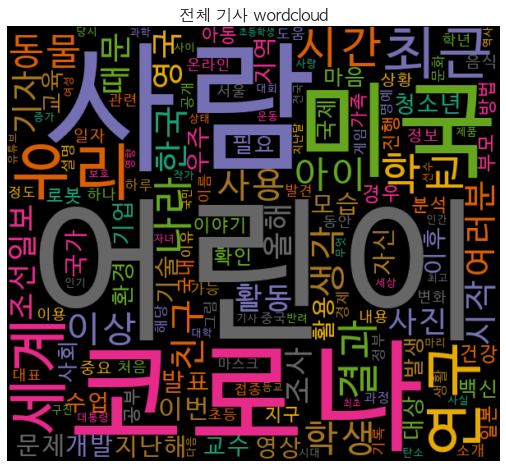

In [62]:
wordcloud(total_dtm['total_news'],'Ï†ÑÏ≤¥ Í∏∞ÏÇ¨ wordcloud')

#### 8.1.3 N-gram
- n-gramÏùÄ nÍ∞úÏùò Ïó∞ÏÜçÏ†ÅÏù∏ Îã®Ïñ¥ ÎÇòÏó¥ÏùÑ ÏùòÎØ∏
- 1-gram : unigram
- 2-gram : bigram
- 3-gram : trigram

In [63]:
def n_grams(tokens, n):
    """
    If length of tokens less then n, return empty list
    """
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

In [64]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

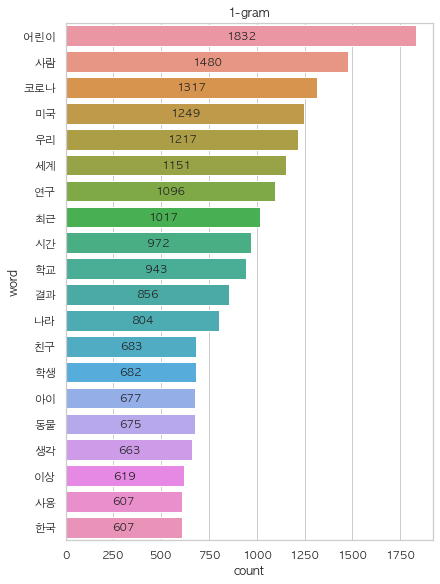

In [65]:
fig,ax=plt.subplots(1,1,figsize=(6,8),constrained_layout=True)
doc = news_df['news_article_mecab']

top_1_bigrams=get_top_ngram(doc,1)[:20]
a,b=map(list,zip(*top_1_bigrams))
word_count = pd.DataFrame({'word':a,'count':b})
sns.barplot(data= word_count,x='count',y='word').set_title('1-gram')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=11)

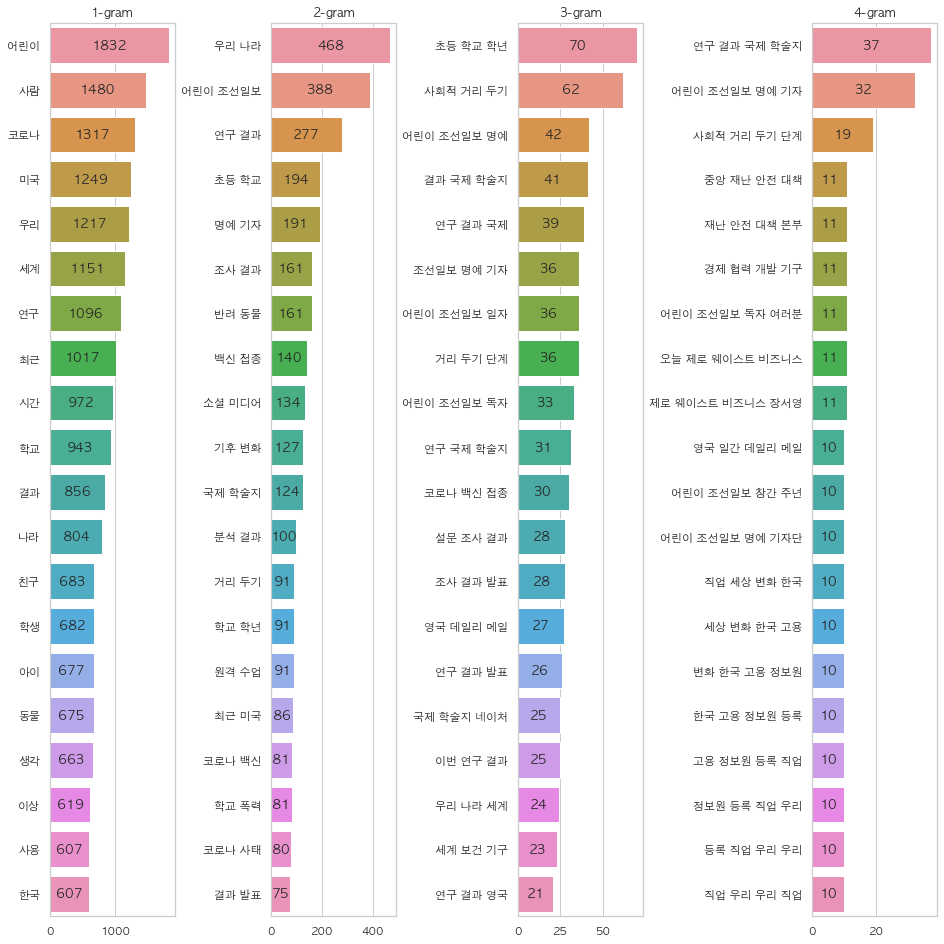

In [66]:
fig,ax=plt.subplots(1,4,figsize=(13,13),constrained_layout=True)
doc = news_df['news_article_mecab']

top_1_bigrams=get_top_ngram(doc,1)[:20]
x,y=map(list,zip(*top_1_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[0]).set_title('1-gram')

top_2_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_2_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[1]).set_title('2-gram')

top_3_bigrams=get_top_ngram(doc,3)[:20]
x,y=map(list,zip(*top_3_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[2]).set_title('3-gram')

top_4_bigrams=get_top_ngram(doc,4)[:20]
x,y=map(list,zip(*top_4_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[3]).set_title('4-gram')

for i in range(len(ax)):
    for p in ax[i].patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax[i].annotate("%.0f"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=13)

### 8.3 Í∏∞ÏÇ¨ Î≥Ñ CountVectorizer ÌôïÏù∏

In [132]:
cv = CountVectorizer(analyzer='word')

count_list = cv.fit_transform(news_df['news_article_mecab'])
list_of_word = cv.get_feature_names()

text_dtm = pd.DataFrame(count_list.toarray(), columns=list_of_word)
text_dtm.index=news_df.news_title
text_dtm = text_dtm.reset_index()
text_dtm.head()

news_title  Í∞ÄÍ∞Ä  Í∞ÄÍ∞ÄÎ¶∞  Í∞ÄÍ∞ê  Í∞ÄÍ∞êÏÇ∞  Í∞ÄÍ≤å  Í∞ÄÍ≤©  Í∞ÄÍ≤©ÎåÄ  Í∞ÄÍ≤©Ìëú  Í∞ÄÍ≥Ñ  \
0  Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©   0    0   0    0   0   0    0    0   0   
1           msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.   0    0   0    0   0   0    0    0   0   
2       Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏   0    0   0    0   0   0    0    0   0   
3    ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.   0    0   0    0   0   9    0    0   0   
4          Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞   0    0   0    0   0   0    0    0   0   

   ...  ÌûåÎëêÏä§ÌÉÑ  ÌûåÏ¶à  ÌûåÌä∏  ÌûêÎùº  ÌûêÎü¨Î¶¨  ÌûêÎ¶¨Ïä§  ÌûêÎßÅ  ÌûêÏä§  ÌûòÏ§Ñ  ÌûôÌï©  
0  ...     0   0   0   0    0    0   0   0   0   0  
1  ...     0   0   0   0    0    0   0   0   0   0  
2  ...     0   0   0   0    0    0   0   0   0   0  
3  ...     0   0   0   0    0    0   0   0   0   0  
4  ...     0   0   0   0    0    0   0   0   0   0  

[5 rows x 20543 columns]

In [133]:
count_list.toarray().sum(axis=0)

array([1, 2, 2, ..., 2, 1, 5])

In [134]:
list_of_word[:10]

['Í∞ÄÍ∞Ä', 'Í∞ÄÍ∞ÄÎ¶∞', 'Í∞ÄÍ∞ê', 'Í∞ÄÍ∞êÏÇ∞', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤©', 'Í∞ÄÍ≤©ÎåÄ', 'Í∞ÄÍ≤©Ìëú', 'Í∞ÄÍ≥Ñ', 'Í∞ÄÍ≥ÑÎèÑ']

In [135]:
text_dtm=text_dtm.transpose()

In [136]:
text_dtm.head()

0                      1     \
news_title  Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©  msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.   
Í∞ÄÍ∞Ä                                       0                      0   
Í∞ÄÍ∞ÄÎ¶∞                                      0                      0   
Í∞ÄÍ∞ê                                       0                      0   
Í∞ÄÍ∞êÏÇ∞                                      0                      0   

                                 2                             3     \
news_title  Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏  ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.   
Í∞ÄÍ∞Ä                                  0                             0   
Í∞ÄÍ∞ÄÎ¶∞                                 0                             0   
Í∞ÄÍ∞ê                                  0                             0   
Í∞ÄÍ∞êÏÇ∞                                 0                             0   

                              4                         5        6     \
news_title  Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞  Ïù∏Í∞ÑÏù¥ Î≥∏Îä•Ï†ÅÏúºÎ°ú ÎÅåÎ¶¨Îäî Ìñ•ÏùÄ Î∞îÎãêÎùº Î≥µÏà≠ÏïÑ  Í∏∞ÏûêÎì§Ïùò ÏàòÎã§   
Í∞ÄÍ∞Ä                               0                         0        0   
Í∞ÄÍ∞ÄÎ¶∞                              0                         0        0   
Í∞ÄÍ∞ê                               0                         0        0   
Í∞ÄÍ∞êÏÇ∞                              0                         0        0   

                                 7                    8     \
news_title  Ïã§ÏàòÎ°ú ÎàÑÎ•∏ Î≥µÍ∂å Î≤ÑÌäº 122Ïñµ Ïõê ÎãπÏ≤® ÎåÄÎ∞ï  Ïñ¥Îñ§ Î™®ÏäµÎèÑ ÏÇ¨ÎûëÏä§Îü¨Ïö¥ Ïö∞Î¶¨ Í∞ÄÏ°±.   
Í∞ÄÍ∞Ä                                  0                    0   
Í∞ÄÍ∞ÄÎ¶∞                                 0                    0   
Í∞ÄÍ∞ê                                  0                    0   
Í∞ÄÍ∞êÏÇ∞                                 0                    0   

                                 9     ...                        1714  \
news_title  Ïò§Îûò ÏïâÎäî ÏäµÍ¥Ä Ïïà Ï¢ãÏïÑ ÏàôÏ†ú ÏãúÍ∞Ñ Ï†ïÌï¥Î≥¥ÏÑ∏Ïöî  ...  Ìä∏ÎüºÌîÑÍ∞Ä Ìã±ÌÜ°ÏùÑ ÎØ∏ÏõåÌïòÎäî ÏßÑÏßú Ïù¥Ïú†Í∞Ä ÏûàÎã§Í≥†Ïöî.   
Í∞ÄÍ∞Ä                                  0  ...                           0   
Í∞ÄÍ∞ÄÎ¶∞                                 0  ...                           0   
Í∞ÄÍ∞ê                                  0  ...                           0   
Í∞ÄÍ∞êÏÇ∞                                 0  ...                           0   

                                          1715                   1716  \
news_title  Îã§Ïù¥ÎÑàÎßàÏù¥Ìä∏ Ï†úÎåÄÎ°ú ÌÑ∞Ï°åÎã§ bts ÎπåÎ≥¥Îìú Ìï´ 100 1ÏúÑ Îã¨ÏÑ±  Î∞©ÌÉÑÏÜåÎÖÑÎã® Î∏îÎûôÌïëÌÅ¨ ÏÑ∏Í≥Ñ ÏùåÏõêÏãúÏû• Ïò¨ÌÇ¨   
Í∞ÄÍ∞Ä                                           0                      0   
Í∞ÄÍ∞ÄÎ¶∞                                          0                      0   
Í∞ÄÍ∞ê                                           0                      0   
Í∞ÄÍ∞êÏÇ∞                                          0                      0   

                              1717                   1718  \
news_title  Ï∞®ÎèÑ Îí§ÏßëÎäî Í±∞ÏÑº Î∞îÎûå ÌÉúÌíç ÎßàÏù¥ÏÇ≠ ÏÉÅÎ•ô  Îâ¥ÌÑ¥Ïùò Ïã§Ìóò ÎÖ∏Ìä∏Ïóî Î¨¥ÏóáÏù¥ Ï†ÅÌòÄÏûàÏùÑÍπå.   
Í∞ÄÍ∞Ä                               0                      0   
Í∞ÄÍ∞ÄÎ¶∞                              0                      0   
Í∞ÄÍ∞ê                               0                      0   
Í∞ÄÍ∞êÏÇ∞                              0                      0   

                                         1719                          1720  \
news_title  ÎÅàÏßàÍ∏∞Í≤å ÏÇ¥ÏïÑÎÇ®ÏùÄ ÎπÑÍ≤∞. Îã•ÏπòÎäî ÎåÄÎ°ú Î®πÍ≥† Ïâº ÏóÜÏù¥ Î≤àÏãùÌñàÏßÄ  ÌñÑÎ≤ÑÍ±∞ Í∞ôÏùÄ Ï†ïÌÅ¨ Ìë∏Îìú ÎßéÏù¥ Î®πÏúºÎ©¥ Îçî Îπ®Î¶¨ ÎäôÎäîÎã§   
Í∞ÄÍ∞Ä                                          0                             0   
Í∞ÄÍ∞ÄÎ¶∞                                         0                             0   
Í∞ÄÍ∞ê                                          0                             0   


In [148]:
text_dtm[0][0]
# text_dtm.iloc[0,0]
# text_dtm.loc[['news_title'], :0]

'Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©'

In [149]:
text_dtm[0][1:].sort_values(ascending=False)[:5]

ÍµêÏú°     6
Ïñ¥Î¶∞Ïù¥    5
Ïö∞ÌÅ¨Îùº    4
ÏïÑÏù¥     3
Ïú†Ïóî     2
Name: 0, dtype: object

In [192]:
text_dtm.iloc[0,0]

'Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©'

In [194]:
for index,text in enumerate(text_dtm.iloc[:, :7]):
    news_rank_dict = text_dtm[text][1:].sort_values(ascending=False)[:5].to_dict()
    print(text_dtm.iloc[0,index],news_rank_dict,sep='\n',end='\n----------\n')

Ïö∞ÌÅ¨Îùº Ï†ÑÏüÅÌÜµÏóêÎèÑ ÍµêÏú°ÏùÄ Í≥ÑÏÜçÎèºÏïº ÌïúÎã§ unÎèÑ ÏßÄÏõêÏÇ¨Í≤©
{'ÍµêÏú°': 6, 'Ïñ¥Î¶∞Ïù¥': 5, 'Ïö∞ÌÅ¨Îùº': 4, 'ÏïÑÏù¥': 3, 'Ïú†Ïóî': 2}
----------
msÍ∞Ä ÎΩëÏùÄ Ïò¨Ìï¥Ïùò Ïä§ÌÉÄÌä∏ÏóÖ ÌÇ§ÏõåÎìúÎäî.
{'Ìä∏Î†åÎìú': 4, 'Ï†ÑÏûê': 3, 'Ïò¨Ìï¥': 3, 'ÏïÑÏãúÏïÑ': 3, 'ÏÑ±Ïû•': 3}
----------
Í±∞ÎåÄ Î≤®Î¶¨Í≥∞ Î≥¥Îü¨ Í∞ÄÏûê Ïû†Ïã§Ïóê 50Îßå Î™Ö Î∞úÍ∏∏
{'Î≤®Î¶¨': 3, 'ÌäπÏÑ±': 1, 'Î°ØÎç∞': 1, 'ÏùòÎØ∏': 1, 'Ïò§Î¶¨': 1}
----------
ÏûêÍ∞ÄÏßÑÎã® ÌÇ§Ìä∏ Í∞ÄÍ≤© ÎÇ¥Î†∏ÎäîÎç∞ Î∞òÌíà ÌôòÎ∂à Ïïà ÎêòÎÇòÏöî.
{'ÌÇ§Ìä∏': 10, 'Í∞ÄÍ≤©': 9, 'ÏßÑÎã®': 7, 'ÌïôÎ∂ÄÎ™®': 4, 'Í≤ÄÏÇ¨': 3}
----------
Í∏àÏúµ Ïù∏ÏÉùÏÑú Íº≠ ÌïÑÏöîÌïú Í≥µÎ∂Ä Ï§ëÏöîÏÑ± Í∞ïÏ°∞
{'Í∏àÏúµ': 8, 'ÍµêÏú°': 3, 'ÎØ∏Íµ≠': 3, 'Ï£ºÏßÄÏÇ¨': 3, 'Ïù∏ÏÉù': 2}
----------
Ïù∏Í∞ÑÏù¥ Î≥∏Îä•Ï†ÅÏúºÎ°ú ÎÅåÎ¶¨Îäî Ìñ•ÏùÄ Î∞îÎãêÎùº Î≥µÏà≠ÏïÑ
{'ÎÉÑÏÉà': 5, 'Ïó∞Íµ¨': 2, 'Í≤∞Í≥º': 2, 'ÏÑ†Ìò∏ÎèÑ': 2, 'Î∞îÏù¥Ïò¨Î°úÏßÄ': 1}
----------
Í∏∞ÏûêÎì§Ïùò ÏàòÎã§
{'Ïù∏Í∞Ñ': 8, 'Ïó¨Îü¨Î∂Ñ': 5, 'Í∞ÄÏÉÅ': 4, 'Ïù¥Î≤à': 3, 'ÏÇ¨Îûå': 3}
----------


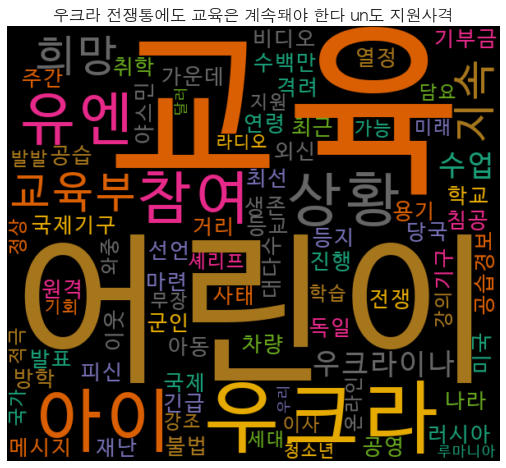

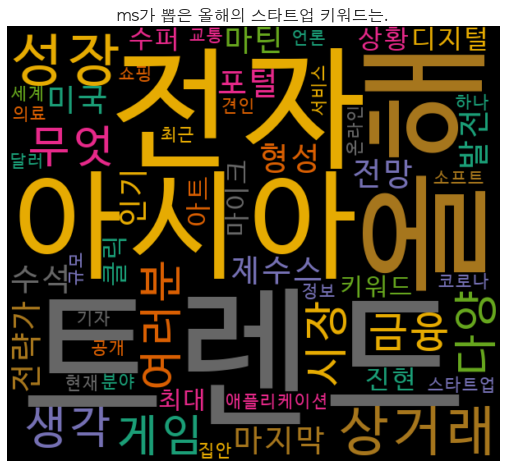

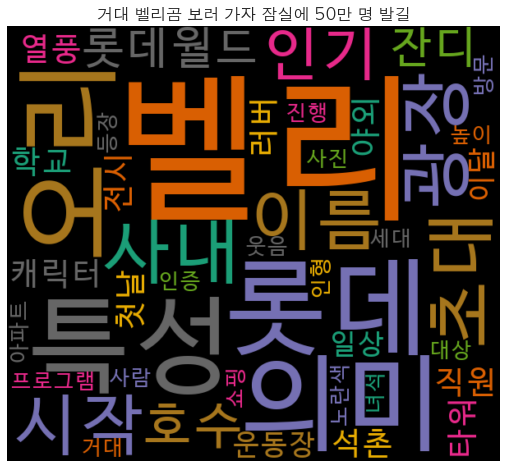

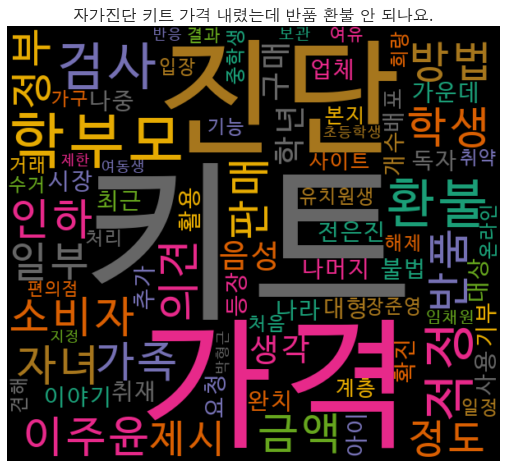

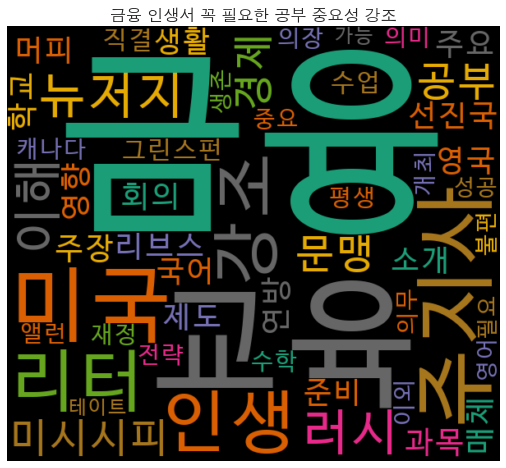

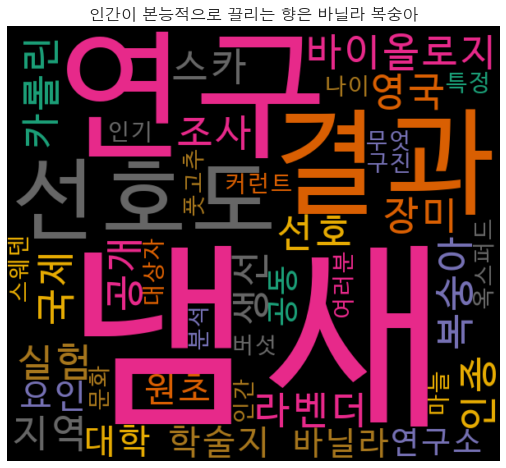

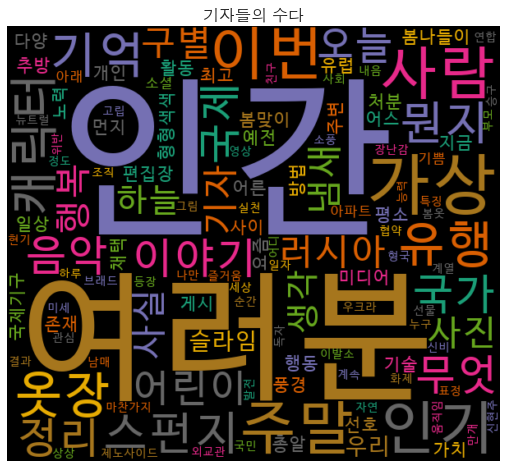

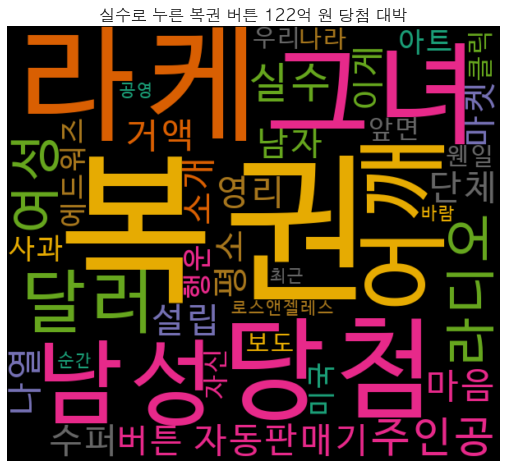

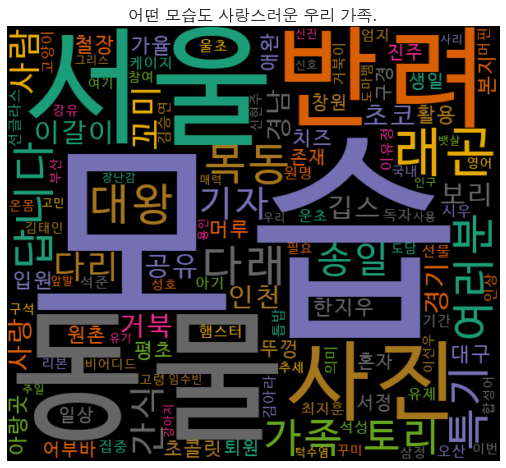

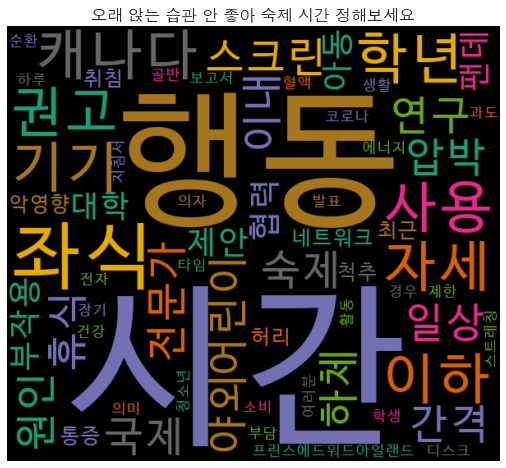

In [195]:
for index,text in enumerate(text_dtm.columns[0:10]):
    wordcloud(text_dtm[index][1:].sort_values(ascending=False),text_dtm.iloc[0,index])